In [5]:
#path='E:/ISIC DATA'
path="/home/seo/ISIC DATA"
trainingpath='E:/Training'

In [6]:
import pickle
name="isic_data"
df=pickle.load(open(name,"rb"))

In [7]:
import os
filelist=os.listdir(path)
meta=[file for file in filelist if not file.endswith(".jpeg") and not file.endswith(".png") and file.startswith("ISIC")]
pics=[file for file in filelist if (file.endswith(".jpeg") or file.endswith(".png")) and file.startswith("ISIC")]

In [8]:
print(pics)

['ISIC_0003525.jpeg', 'ISIC_0030102.jpeg', 'ISIC_0004507.jpeg', 'ISIC_0012744.jpeg', 'ISIC_0006441.jpeg', 'ISIC_0034040.jpeg', 'ISIC_0028444.jpeg', 'ISIC_0005813.jpeg', 'ISIC_0029842.jpeg', 'ISIC_0002807.jpeg', 'ISIC_0002698.jpeg', 'ISIC_0032395.jpeg', 'ISIC_0007874.jpeg', 'ISIC_0027286.jpeg', 'ISIC_0032454.jpeg', 'ISIC_0007816.jpeg', 'ISIC_0003674.jpeg', 'ISIC_0012224.jpeg', 'ISIC_0009254.jpeg', 'ISIC_0007001.jpeg', 'ISIC_0027814.jpeg', 'ISIC_0009375.jpeg', 'ISIC_0033075.jpeg', 'ISIC_0001081.jpeg', 'ISIC_0029212.jpeg', 'ISIC_0009804.jpeg', 'ISIC_0011922.jpeg', 'ISIC_0030086.jpeg', 'ISIC_0013311.jpeg', 'ISIC_0031096.jpeg', 'ISIC_0011367.jpeg', 'ISIC_0006888.jpeg', 'ISIC_0031672.jpeg', 'ISIC_0002385.jpeg', 'ISIC_0011358.jpeg', 'ISIC_0012673.jpeg', 'ISIC_0005089.jpeg', 'ISIC_0030406.jpeg', 'ISIC_0010917.jpeg', 'ISIC_0013739.jpeg', 'ISIC_0011532.jpeg', 'ISIC_0025517.jpeg', 'ISIC_0029669.jpeg', 'ISIC_0009083.jpeg', 'ISIC_0008171.jpeg', 'ISIC_0032218.jpeg', 'ISIC_0004339.jpeg', 'ISIC_000652

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def initial_segmentation(image):
    norm_img= cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    r,g,b=split_into_rgb_channels(norm_img)
    gaussian = cv2.GaussianBlur(b,(3,3),0)
    fig,ax =plt.subplots(figsize = (10,10))
    #R,G,B=split_into_rgb_channels(img)


    kernel = np.ones((5,5),np.uint8)
    #gray = cv2.cvtColor(gaussian, cv2.COLOR_RGB2GRAY)
    th, threshed = cv2.threshold(gaussian, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    erosion = cv2.erode(threshed,kernel,iterations = 3)
    dilation = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
    ## Find the first contour that greate than 100, locate in centeral region
    ## Adjust the parameter when necessary
    cnts, hierarchy=cv2.findContours(erosion,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )
    cnts = sorted(cnts, key=cv2.contourArea)
    H,W = img.shape[:2]
    maxContour = 0


    for contour in cnts:
        cv2.drawContours(img,contour,-1,(255,0,0),-1)
        contourSize = cv2.contourArea(contour)
        if contourSize > maxContour:
            maxContour = contourSize
            maxContourData = contour
        #if contour
    cv2.drawContours(img,[contour],-1,(255,0,0),-1)
    ## Create mask and do bitwise-op
    mask = np.zeros(img.shape[:2],np.uint8)
    cv2.drawContours(mask, [contour],-1, 255, -1)
    #area = cv2.contourArea(contour)
    dst = cv2.bitwise_and(gaussian, gaussian, mask=mask)
    #plt.subplot(1,2,1),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
    #plt.subplot(1,2,2),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('only roi')
    
    return dst

In [10]:
good=[]
bad=[]

In [11]:
def split_into_rgb_channels(image):
    """Split the target image into its red, green and blue channels.image - a numpy array of shape (rows, columns, 3).
    output - three numpy arrays of shape (rows, columns) and dtype same as
    image, containing the corresponding channels.
    """
    red = image[:,:,2]
    green = image[:,:,1]
    blue = image[:,:,0]
    return red, green, blue

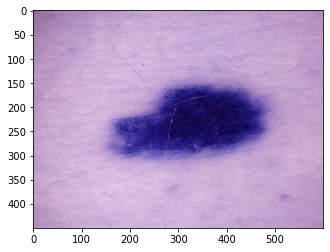

In [18]:
import cv2

filename=path+'/'+pics[3251] # malignant
#filename=path+'/'+pics[99] # benign
#filename=path+'/'+pics[55] # benign
#filename=path+'/'+pics[75] # benign
#filename=path+'/'+pics[14] # benign
#filename=path+'/'+pics[5] # 
#filename=path+'/'+pics[281] # malignant
#filename=path+'/'+pics[516] # malignant
#filename='E:/Desktop/Melanoma.jpg' # malignant

#orig_img=cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
#Co_img=cv2.applyColorMap(orig_img, cv2.COLORMAP_JET)

orig_img=cv2.imread(filename, cv2.IMREAD_COLOR)
plt.imshow(orig_img)
#plt.imshow(Co_img), plt.colorbar()

img=orig_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

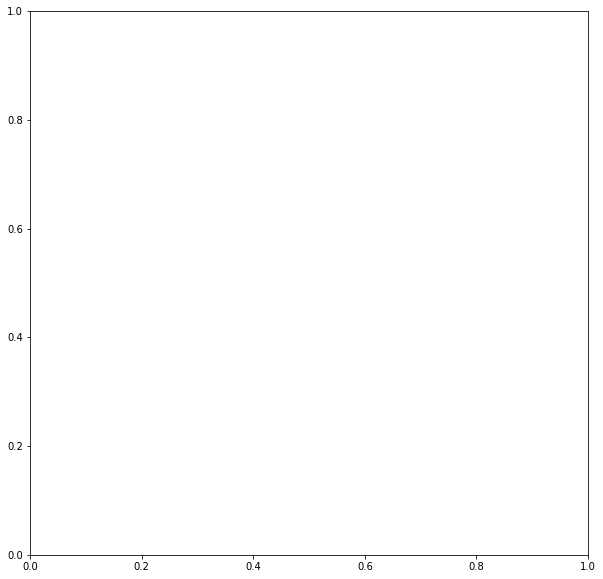

In [19]:
initial_segmentation(img)

/home/seo/ISIC DATA/ISIC_0011367.jpeg


error: OpenCV(4.1.0) /io/opencv/modules/core/src/arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


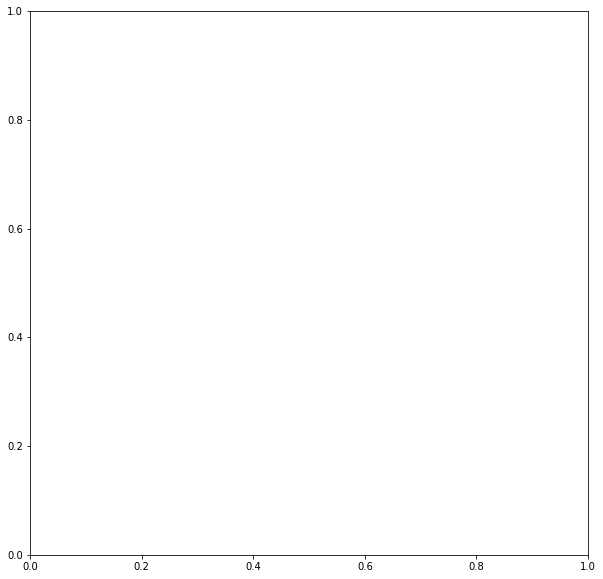

In [20]:
import time
import matplotlib.pyplot as plt
for i in range(len(pics)):
    filename=path+'/'+pics[i+30]
    print(filename)
    orig_img=cv2.imread(filename, cv2.IMREAD_COLOR)
    dst=initial_segmentation(orig_img)

E:/Desktop/snip/ISIC_0000010.jpeg


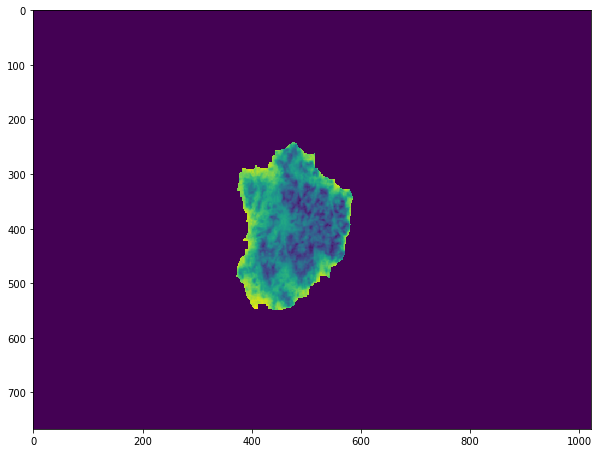

In [26]:
filename=path+'/'+pics[7]
print(filename)
img=cv2.imread(filename, cv2.IMREAD_COLOR)
plt.imshow(initial_segmentation(img))

In [31]:
split_into_rgb_channels(image)

NameError: name 'image' is not defined

In [25]:
orig_cnts=cnts
new_cnts=list()
for con in range(len(cnts)):
    contour=cnts[con]
    bunch=[tuple(contour[num][0]) for num in range(len(contour))]
    y_min=min(bunch, key=lambda t: t[0])[0]
    y_max=max(bunch, key=lambda t: t[0])[0]
    x_min=min(bunch, key=lambda t: t[1])[1]
    x_max=max(bunch, key=lambda t: t[1])[1]
    
    y_count=0
    x_count=0

    for num in bunch:
        if num[0]==x_min:
            x_count=x_count+1
        if num[0]==x_max:
            x_count=x_count+1
        if num[1]==y_min:
            y_count=y_count+1
        if num[1]==y_max:
            y_count=y_count+1
    if (x_count>round(img.shape[:2][0]*0.6)) or (y_count>round(img.shape[:2][1]*0.6)):
        #new_cnts.append(cnts[con])
        cnts.pop(con)


for contour in cnts:
    cv2.drawContours(img,contour,-1,(255,0,0),-1)
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour
    #if contour
cv2.drawContours(img,[contour],-1,(255,0,0),-1)
## Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [contour],-1, 255, -1)
#area = cv2.contourArea(contour)
dst = cv2.bitwise_and(gaussian, gaussian, mask=mask)
plt.subplot(2,1,1),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(2,1,2),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('only roi')

NameError: name 'cnts' is not defined

In [20]:
ans=input()

y


In [24]:
if ans=='y':
    good.append(filename)
else:
    bad.append(filename)

ho


In [1]:
import cv2
for contour in cnts:
    cv2.drawContours(img,contour,-1,(255,0,0),-1)
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour
    #if contour
cv2.drawContours(img,[contour],-1,(255,0,0),-1)
## Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [contour],-1, 255, -1)
#area = cv2.contourArea(contour)
dst = cv2.bitwise_and(gaussian, gaussian, mask=mask)
plt.subplot(2,2,3),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(2,2,4),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('only roi')

NameError: name 'cnts' is not defined